In [17]:
import tensorflow as tf 

In [18]:
x = tf.zeros([10, 10])
x += 2
x

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]], dtype=float32)>

In [19]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

In [20]:
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [21]:
v.assign(3.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [22]:
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [23]:
v.assign(tf.square(v))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=9.0>

In [24]:
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.0>

In [25]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return  self.W * x + self.b

In [26]:
model = Model()

In [27]:
model(3.0).numpy()

15.0

In [28]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [29]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_B + noise

In [30]:
outputs

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.06721902e+00,  3.95997429e+00,  3.27444744e+00,  1.04361586e-02,
        4.16951752e+00,  6.00010586e+00,  3.29094934e+00, -1.84269691e+00,
        4.96772146e+00,  5.61545420e+00,  4.83511353e+00,  7.83876324e+00,
        4.76999140e+00,  2.42381001e+00,  1.71909761e+00,  1.10503483e+00,
        3.63541961e+00,  2.88661242e+00,  7.64655781e+00,  4.27598357e-02,
        2.46990353e-01, -1.63689637e+00,  3.58990335e+00,  2.20524296e-01,
        4.72472095e+00,  7.11502910e-01, -1.27371812e+00,  5.84132552e-01,
        2.52635360e+00, -4.80435467e+00,  8.81616497e+00, -6.22102380e-01,
       -5.39277077e-01,  3.65947509e+00,  4.58228731e+00,  3.24345970e+00,
       -3.83151352e-01, -2.65272331e+00,  2.31475186e+00, -1.16569996e-01,
        1.50063264e+00,  4.53537941e+00,  4.90473938e+00, -1.34825063e+00,
       -1.39381659e+00,  3.65989685e-01,  6.70186043e-01, -3.74876857e-01,
        3.24768639e+00,  3.27917743e+00,  4.5333087

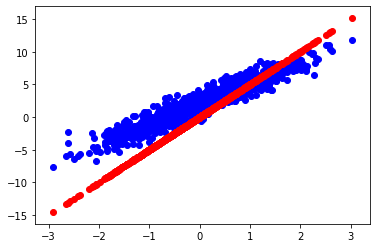

In [31]:
import matplotlib.pyplot as plt 

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [32]:
loss(model(inputs), outputs).numpy()

9.044309

In [33]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [34]:
model = Model()

In [35]:
model.W, model.b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>)

In [38]:
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=3.25 b=1.91, loss=1.07359
Epoch  1: W=3.21 b=1.94, loss=1.05169
Epoch  2: W=3.18 b=1.97, loss=1.03762
Epoch  3: W=3.16 b=1.99, loss=1.02858
Epoch  4: W=3.14 b=2.01, loss=1.02277
Epoch  5: W=3.12 b=2.02, loss=1.01903
Epoch  6: W=3.11 b=2.03, loss=1.01662
Epoch  7: W=3.10 b=2.04, loss=1.01508
Epoch  8: W=3.09 b=2.05, loss=1.01408
Epoch  9: W=3.09 b=2.06, loss=1.01344


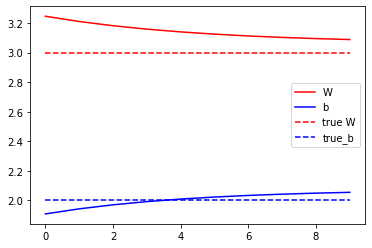

In [40]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_B] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()